# Springboard Capstone 02 - Energy generation prediction based on energy and weather data
## Pre-processing

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz
from pytz import timezone
from pandas import Grouper
from pandas import concat
from pandas import DataFrame
import matplotlib.ticker as mtick

In [2]:
#import dataframe and deal with date column
#eng_wea_df = pd.read_csv('data/energy_weather.csv')
eng_wea_df = pd.read_pickle('data/energy_weather_shift.pkl')

eng_wea_df['date'] = pd.to_datetime(eng_wea_df['date'], utc=False)
#Convert to Madrid timezone
eng_wea_df['date'] = pd.to_datetime(eng_wea_df['date']).dt.date

# #eng_wea_df.set_index('date', inplace=True)
# energy_weather_df.drop(columns='Unnamed: 0', inplace=True)

eng_wea_df.head()

,date,city_name,generation biomass_daily_max,generation fossil brown coal/lignite_daily_max,generation fossil gas_daily_max,generation fossil hard coal_daily_max,generation fossil oil_daily_max,generation hydro pumped storage consumption_daily_max,generation hydro run-of-river and poundage_daily_max,generation hydro water reservoir_daily_max,...,month,day_of_week,temp_daily_max,pressure_daily_max,humidity_daily_max,wind_speed_daily_max,rain_1h_daily_max,rain_3h_daily_max,snow_3h_daily_max,clouds_all_daily_max
0,2015-01-02,Barcelona,443.0,0.0,6082.0,1432.0,220.0,3269.0,1370.0,5902.0,...,1,Friday,11.452313,1038.0,100.0,7.0,0.0,0.0,0.0,0.0
1,2015-01-02,Bilbao,443.0,0.0,6082.0,1432.0,220.0,3269.0,1370.0,5902.0,...,1,Friday,11.441688,1036.0,97.0,1.0,0.0,0.0,0.0,24.0
2,2015-01-02,Madrid,443.0,0.0,6082.0,1432.0,220.0,3269.0,1370.0,5902.0,...,1,Friday,10.158313,1036.0,75.0,1.0,0.0,0.0,0.0,0.0
3,2015-01-02,Seville,443.0,0.0,6082.0,1432.0,220.0,3269.0,1370.0,5902.0,...,1,Friday,13.844000,1043.0,84.0,4.0,0.0,0.0,0.0,0.0
4,2015-01-02,Valencia,443.0,0.0,6082.0,1432.0,220.0,3269.0,1370.0,5902.0,...,1,Friday,12.127344,1035.0,84.0,2.0,0.0,0.0,0.0,0.0


In [3]:
eng_wea_df.columns

Index(['date', 'city_name', 'generation biomass_daily_max',
       'generation fossil brown coal/lignite_daily_max',
       'generation fossil gas_daily_max',
       'generation fossil hard coal_daily_max',
       'generation fossil oil_daily_max',
       'generation hydro pumped storage consumption_daily_max',
       'generation hydro run-of-river and poundage_daily_max',
       'generation hydro water reservoir_daily_max',
       'generation nuclear_daily_max', 'generation other_daily_max',
       'generation other renewable_daily_max', 'generation solar_daily_max',
       'generation waste_daily_max', 'generation wind onshore_daily_max',
       'forecast solar day ahead_daily_max',
       'forecast wind onshore day ahead_daily_max',
       'total load forecast_daily_max', 'total load actual_daily_max',
       'price day ahead_daily_max', 'price actual_daily_max',
       'gen_total_daily_max', 'month', 'day_of_week', 'temp_daily_max',
       'pressure_daily_max', 'humidity_daily_max'

In [4]:
# eng_wea_df.columns = eng_wea_df.columns.get_level_values(0)
# eng_wea_df.head(15)

In [5]:
eng_wea_df.set_index('date', inplace=True)

In [6]:
eng_wea_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7300 entries, 2015-01-02 to 2018-12-31
Data columns (total 32 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   city_name                                              7300 non-null   object 
 1   generation biomass_daily_max                           7300 non-null   float64
 2   generation fossil brown coal/lignite_daily_max         7300 non-null   float64
 3   generation fossil gas_daily_max                        7300 non-null   float64
 4   generation fossil hard coal_daily_max                  7300 non-null   float64
 5   generation fossil oil_daily_max                        7300 non-null   float64
 6   generation hydro pumped storage consumption_daily_max  7300 non-null   float64
 7   generation hydro run-of-river and poundage_daily_max   7300 non-null   float64
 8   generation hydro water reservoir_daily

## 2.0 Converting Categorical Features

In [7]:
eng_wea_df = pd.get_dummies(eng_wea_df, columns=['city_name', 'month', 'day_of_week'])
eng_wea_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7300 entries, 2015-01-02 to 2018-12-31
Data columns (total 53 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   generation biomass_daily_max                           7300 non-null   float64
 1   generation fossil brown coal/lignite_daily_max         7300 non-null   float64
 2   generation fossil gas_daily_max                        7300 non-null   float64
 3   generation fossil hard coal_daily_max                  7300 non-null   float64
 4   generation fossil oil_daily_max                        7300 non-null   float64
 5   generation hydro pumped storage consumption_daily_max  7300 non-null   float64
 6   generation hydro run-of-river and poundage_daily_max   7300 non-null   float64
 7   generation hydro water reservoir_daily_max             7300 non-null   float64
 8   generation nuclear_daily_max          

## 3.0 Splitting data

In [8]:
from sklearn.model_selection import train_test_split

X = eng_wea_df.drop(columns=['generation wind onshore_daily_max', 'forecast wind onshore day ahead_daily_max'])
y = eng_wea_df['generation wind onshore_daily_max']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## 4.0 Pipeline

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_validate, GridSearchCV, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [10]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    LinearRegression()
)

In [11]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [12]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [13]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.819257312189912, 0.824399903287466)

In [14]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(1060.9191460202646, 1043.6771563282787)

In [15]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(1875481.2260913467, 1745713.8008609721)

In [16]:
import numpy as np
#root mean_squared error
np.sqrt(mean_squared_error(y_train, y_tr_pred)), np.sqrt(mean_squared_error(y_test, y_te_pred))

(1369.482101413285, 1321.2546313489206)

## Adding SelectKBest using default k of 10

In [17]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [18]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x000002772D10C2C0>)),
                ('linearregression', LinearRegression())])

In [19]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [20]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7517543248064532, 0.7497105106822055)

In [21]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(1244.5626903016023, 1237.7329228748117)

In [22]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(2575927.739732781, 2488232.204266954)

In [23]:
#root mean_squared error
np.sqrt(mean_squared_error(y_train, y_tr_pred)), np.sqrt(mean_squared_error(y_test, y_te_pred))

(1604.969700565335, 1577.4131368373203)

## Cross validation

In [24]:
cv_results = cross_validate(pipe, X_train, y_train, cv=5)

In [25]:
cv_scores = cv_results['test_score']
cv_scores

array([0.74820588, 0.72683403, 0.7605614 , 0.75666205, 0.75483392])

In [26]:
np.mean(cv_scores), np.std(cv_scores)

(0.749419456599571, 0.011979054176992287)

In [27]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.73, 0.77])

## Hyperparameter Search with GridSearchCV

In [28]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}
grid_params

{'selectkbest__k': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51]}

In [29]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [30]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000002772D10C2C0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [31]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [32]:
#Code task 19#
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 47}

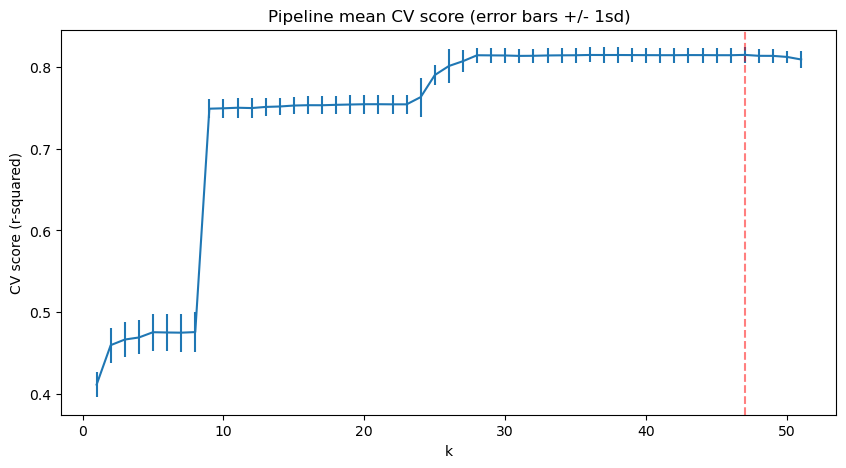

In [33]:
#Code task 20#
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

plt.savefig('images/windonshore_linearCV_bestk.png')

In [34]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [35]:
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

gen_total_daily_max                                      2348.992991
generation hydro pumped storage consumption_daily_max     727.422508
total load actual_daily_max                               666.725936
price day ahead_daily_max                                 590.848120
month_11                                                   92.412917
generation fossil oil_daily_max                            65.324008
month_9                                                    64.778607
generation waste_daily_max                                 49.433521
month_10                                                   47.175929
month_2                                                    30.560438
wind_speed_daily_max                                       11.758685
day_of_week_Thursday                                       11.058545
city_name_Seville                                          10.002621
month_1                                                     8.882212
rain_1h_daily_max                 

## Random Forest

In [36]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [37]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [38]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.97792715, 0.97239786, 0.97768948, 0.97340842, 0.98471497])

In [39]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.9772275753879756, 0.004351459367905505)

## Hyperparameter search using GridSearchCV

In [40]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=5)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10, 31, 100, 316, 1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [41]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [42]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 31, 100,
                                                                 316, 1000],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [43]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 1000,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [44]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.9786744 , 0.9755732 , 0.97782603, 0.97363875, 0.98558404])

In [45]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.9782592854552797, 0.004063901220486265)

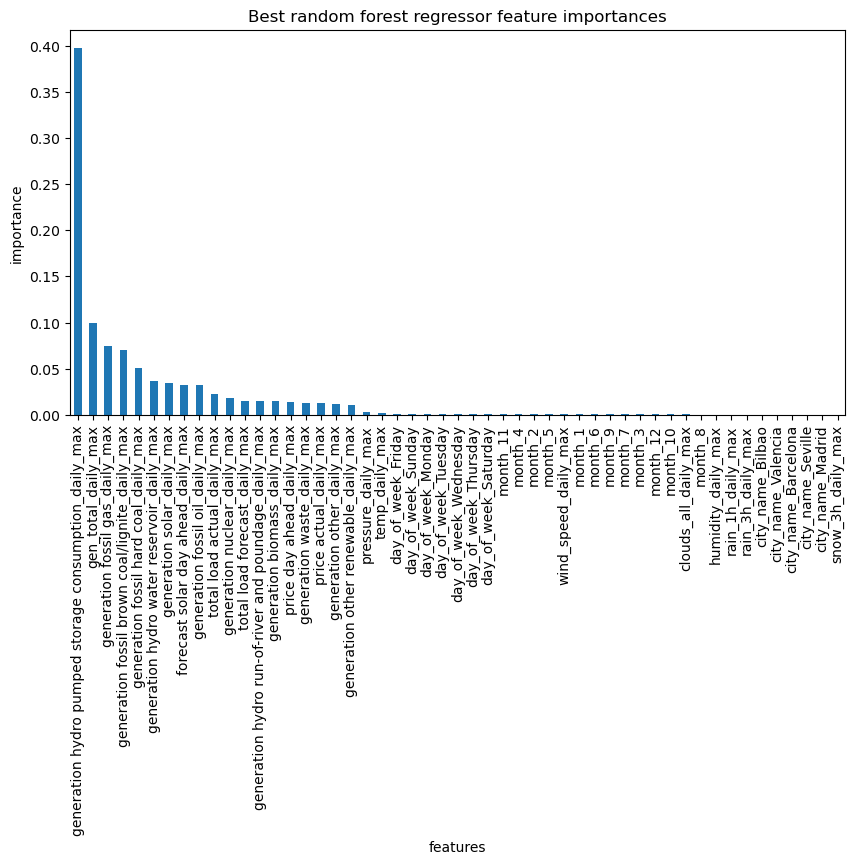

In [46]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

plt.savefig('images/windonshore_best_RF_featureimp.png')

## Selecting best model

### Linear Regression evaluation

In [47]:
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [48]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(1072.0274277049812, 7.102073608465882)

In [49]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

1043.3632525783526

### Random Forest evaluation

In [50]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [51]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(276.40184716242663, 16.758734683425548)

In [52]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

154.0273310502283

## Further assessment

In [53]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

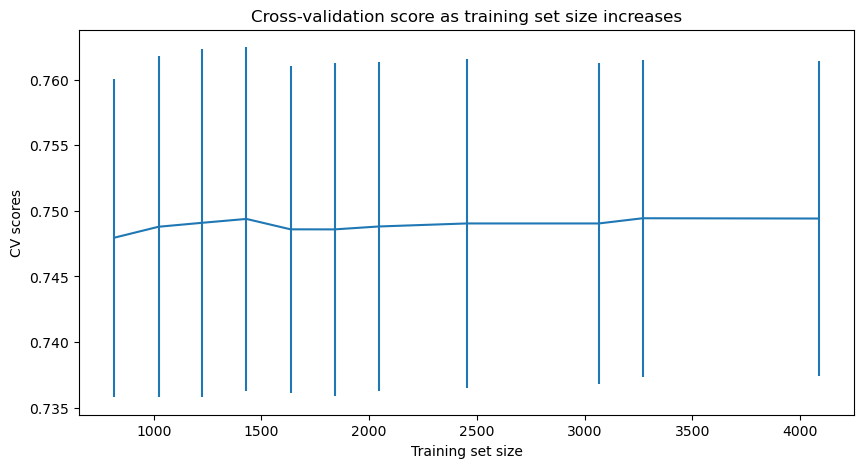

In [54]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

plt.savefig('images/windonshore_linear_CV_trainingsetsize.png')

## Saving model

In [55]:
import sklearn
from datetime import datetime
best_model = rf_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
#best_model.sklearn_version = sklearn_version
best_model.sklearn_version = sklearn.__version__
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.now()

In [56]:
# save the model
# from library.sb_utils import save_file
# modelpath = '../models'
# save_file(best_model, 'energy_weather_fossil_hard_coal.pkl', modelpath)
import pickle
import os
#os.makedirs('../model')
filepathname = 'model/energy_weather_wind_onshore.pkl'

pickle.dump(best_model, open(filepathname, 'wb'))
#loaded_model = pickle.load(open(filename, 'rb'))